In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

In [2]:
embeddings = pd.read_pickle("../data/datasets/g1-news/articles_embeddings.pickle")
metadata = pd.read_csv("../data/datasets/g1-news/articles_metadata.csv")

In [3]:
metadata.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [4]:
# only select classes that have more than 1% of dataset samples
total_size = len(embeddings)
threshold = total_size // 100
grouped_metadata = metadata.groupby(by=["category_id"]).count()
selected_classes = grouped_metadata[grouped_metadata["article_id"] >= threshold].index
print(f"Total number of classes = {metadata.category_id.nunique()}")
print(f"Number of selected classes = {selected_classes.shape[0]}")

Total number of classes = 461
Number of selected classes = 36


In [5]:
grouped_metadata.reset_index(inplace=True)
grouped_metadata

,category_id,article_id,created_at_ts,publisher_id,words_count
0,0,1,1,1,1
1,1,4418,4418,4418,4418
2,2,861,861,861,861
3,3,9,9,9,9
4,4,128,128,128,128
...,...,...,...,...,...
456,456,23,23,23,23
457,457,3,3,3,3
458,458,673,673,673,673
459,459,4,4,4,4


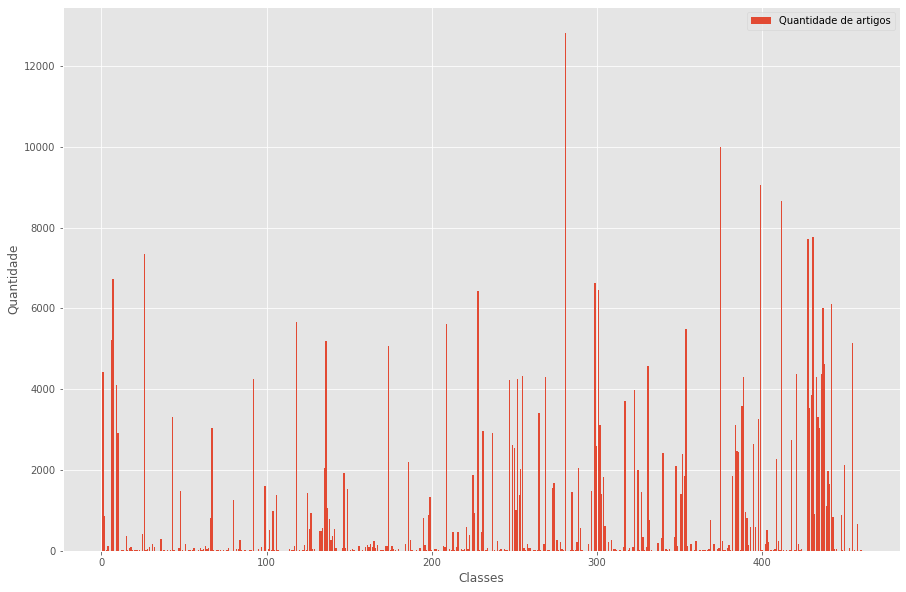

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
plt.bar(
    grouped_metadata['category_id'].values,
    grouped_metadata['article_id'].values,
    label='Quantidade de artigos'
)
ax.legend(loc='upper right', fontsize='medium')      
ax.set_ylabel("Quantidade")
ax.set_xlabel('Classes')
plt.show()

fig.savefig(
    f'../images/dist_classes.png',
    transparent=False,
    dpi=100,
    bbox_inches="tight"
)

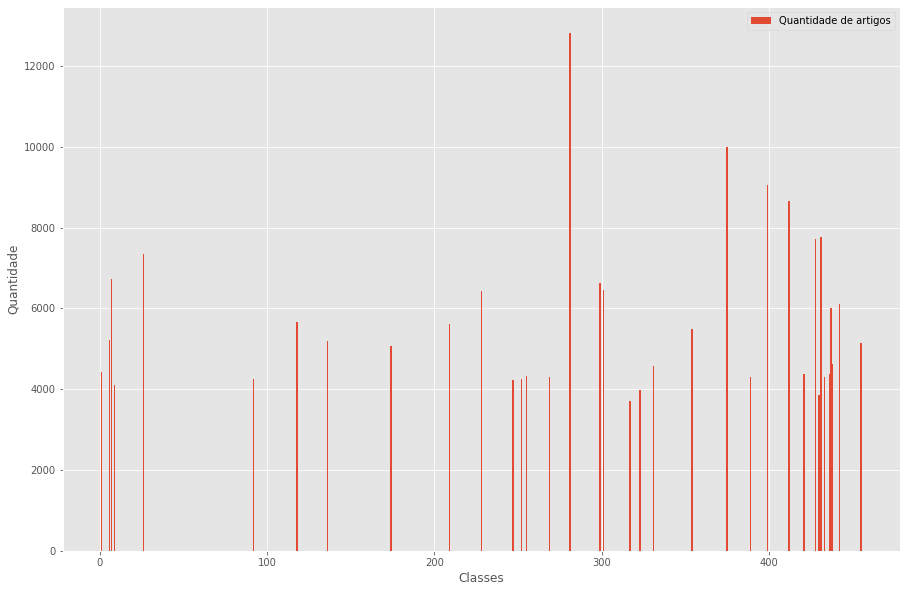

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
plt.bar(
    grouped_metadata.iloc[selected_classes]['category_id'].values,
    grouped_metadata.iloc[selected_classes]['article_id'].values,
    label='Quantidade de artigos'
)
ax.legend(loc='upper right', fontsize='medium')      
ax.set_ylabel("Quantidade")
ax.set_xlabel('Classes')
plt.show()

fig.savefig(
    f'../images/dist_selected_classes.png',
    transparent=False,
    dpi=100,
    bbox_inches="tight"
)

In [8]:
filtered_metadata = metadata[metadata["category_id"].isin(selected_classes)]
y = filtered_metadata["category_id"].values
y.shape

(207106,)

In [9]:
X = embeddings[filtered_metadata["article_id"].values, :]
X.shape

(207106, 250)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [24]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [68]:
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(0, 21)
relu = np.maximum(0, x1)
soft = softmax(x2)

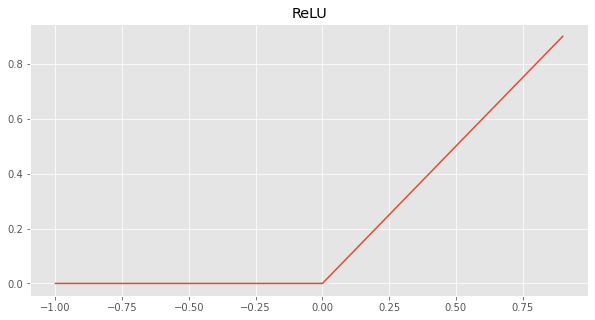

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.plot(x1, relu)
ax.set_title("ReLU")
fig.savefig(
    f'../images/relu.png',
    transparent=False,
    dpi=100,
    bbox_inches="tight"
)

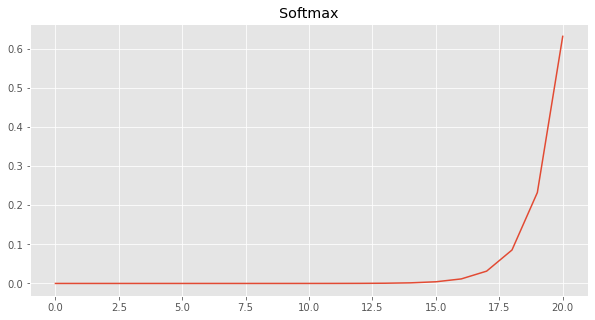

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.plot(x2, soft)
ax.set_title("Softmax")
fig.savefig(
    f'../images/softmax.png',
    transparent=False,
    dpi=100,
    bbox_inches="tight"
)